In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

# Load medical dataset
medical= pd.read_csv('medical_clean.csv')

In [2]:
# Check for duplicates in the dataset
print("Duplicates?:")
print(medical.duplicated().value_counts())

Duplicates?:
False    10000
Name: count, dtype: int64


In [3]:
# Identify missing values in each column
missing_values = medical.isnull().sum()
print("\nMissing Values in Medical dataset Each Column:")
print(missing_values)


Missing Values in Medical dataset Each Column:
CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days    

In [4]:
# Summary statistics
medical.describe(include='all').round(2)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00,10000,10000,10000,10000,10000,10000,10000.00,10000.00,10000.00,...,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
unique,NaN,10000,10000,10000,6072,52,1607,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Houston,TX,Jefferson,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,1,36,553,118,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50,NaN,NaN,NaN,NaN,NaN,NaN,50159.32,38.75,-91.24,...,5312.17,12934.53,3.52,3.51,3.51,3.52,3.50,3.52,3.49,3.51
std,2886.90,NaN,NaN,NaN,NaN,NaN,NaN,27469.59,5.40,15.21,...,2180.39,6542.60,1.03,1.03,1.03,1.04,1.03,1.03,1.02,1.04
min,1.00,NaN,NaN,NaN,NaN,NaN,NaN,610.00,17.97,-174.21,...,1938.31,3125.70,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2500.75,NaN,NaN,NaN,NaN,NaN,NaN,27592.00,35.26,-97.35,...,3179.37,7986.49,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
50%,5000.50,NaN,NaN,NaN,NaN,NaN,NaN,50207.00,39.42,-88.40,...,5213.95,11573.98,4.00,3.00,4.00,4.00,3.00,4.00,3.00,3.00
75%,7500.25,NaN,NaN,NaN,NaN,NaN,NaN,72411.75,42.04,-80.44,...,7459.70,15626.49,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00


In [5]:
# Define a function to count outliers using IQR
def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers.sum()

# Select numeric columns for outlier detection
numeric_columns = medical.select_dtypes(include=['float64', 'int64'])

# Count outliers for each numeric column
count_outliers = numeric_columns.apply(count_outliers)

# Display the count of outliers
print(count_outliers)

CaseOrder               0
Zip                     0
Lat                   150
Lng                   237
Population            855
Children              411
Age                     0
Income                326
VitD_levels            60
Doc_visits              0
Full_meals_eaten        8
vitD_supp              70
Initial_days            0
TotalCharge             0
Additional_charges    424
Item1                 449
Item2                 429
Item3                 443
Item4                 450
Item5                 443
Item6                 443
Item7                 438
Item8                 442
dtype: int64


In [6]:
# C1 Drop Unused Features
medical = medical[['Age', 'Income', 'VitD_levels','TotalCharge']]

In [7]:
# C2 Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(medical)
scaled_medical = pd.DataFrame(scaled_data, columns = medical.columns)

# Ensure scaling worked and std close to 1
print("\nStandard Deviation of Scaled Data:")
print(scaled_medical.std())


Standard Deviation of Scaled Data:
Age            1.00005
Income         1.00005
VitD_levels    1.00005
TotalCharge    1.00005
dtype: float64


In [8]:
# Export new cleaned dataset
scaled_medical.to_csv('PCA_medical.csv', index=False)

In [9]:
# Perform PCA
pca = PCA()
pca.fit(scaled_medical)


PCA()

In [10]:
# D1. Determine the matrix of all the principal components
pca_components = pca.components_
print("Matrix of Principal Components:")
print(pca_components)

Matrix of Principal Components:
[[-0.55907815  0.55384824 -0.36412614 -0.49809227]
 [-0.12063183 -0.14175941  0.78245642 -0.59423411]
 [ 0.68796726  0.70151863  0.15375496 -0.10455654]
 [-0.44674449  0.42547386  0.48117929  0.62278234]]



Number of Principal Components according to Kaiser criterion: 2


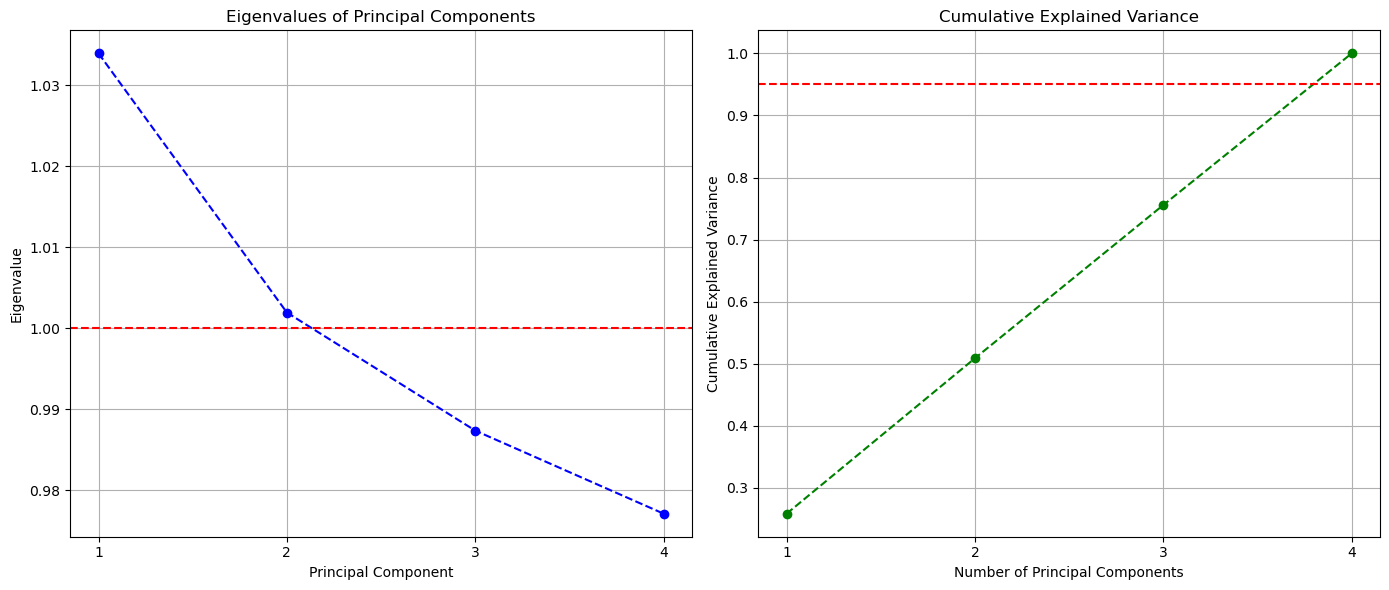

<Figure size 640x480 with 0 Axes>

In [11]:
# D2. Identify the total number of principal components using the Kaiser criterion
# Calculate eigenvalues
eigenvalues = pca.explained_variance_

# Apply the Kaiser criterion (eigenvalue > 1)
kaiser_criterion = np.sum(eigenvalues > 1)
print(f"\nNumber of Principal Components according to Kaiser criterion: {kaiser_criterion}")

# Plotting the eigenvalues for Kaiser criterion and cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

plt.figure(figsize=(14, 6))

# Plot for Kaiser Criterion (Eigenvalues)
plt.subplot(1, 2, 1)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--', color='b')
plt.axhline(y=1, color='r', linestyle='--')  # The Kaiser Criterion line
plt.title('Eigenvalues of Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.xticks(range(1, len(eigenvalues) + 1))

# Plot for Elbow Method (Cumulative Explained Variance)
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='g')
plt.axhline(y=0.95, color='r', linestyle='--')  # The 95% variance threshold line
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.xticks(range(1, len(cumulative_explained_variance) + 1))

# Show plots
plt.tight_layout()
plt.show()

In [12]:
# D3. Identify the variance of each of the principal components
pca = PCA(n_components=2)
pca_transformed_data = pca.fit_transform(scaled_medical)
explained_variance = pca.explained_variance_ratio_
variance_per_component = explained_variance * 100
print("\nVariance of Each Principal Component (%):")
for i, var in enumerate(variance_per_component, 1):
    print(f"PC{i}: {var:.2f}%")


Variance of Each Principal Component (%):
PC1: 25.85%
PC2: 25.05%


In [13]:
# D4. Identify the total variance captured by the selected principal components
total_variance_captured = np.sum(variance_per_component)
print(f"\nTotal Variance Captured by the First Two Principal Components: {total_variance_captured:.2f}%")


Total Variance Captured by the First Two Principal Components: 50.89%


In [14]:
# D5. Summarize the results
summary = f"""
PCA Analysis Summary:
- Number of Principal Components Retained: 2
- Total Variance Captured by the First Two Principal Components: {total_variance_captured:.2f}%
- Principal Components Analysis suggests that the first two components capture a significant portion of the variance.
"""
print(summary)


PCA Analysis Summary:
- Number of Principal Components Retained: 2
- Total Variance Captured by the First Two Principal Components: 50.89%
- Principal Components Analysis suggests that the first two components capture a significant portion of the variance.

